### Name : Jayasinghe D.R.
### Index No : 190262L
GitHub : https://github.com/jayasinghedr/EN2550_Image_Processing_and_Machine_Vision 

#### Question 1
Intensity Transformation

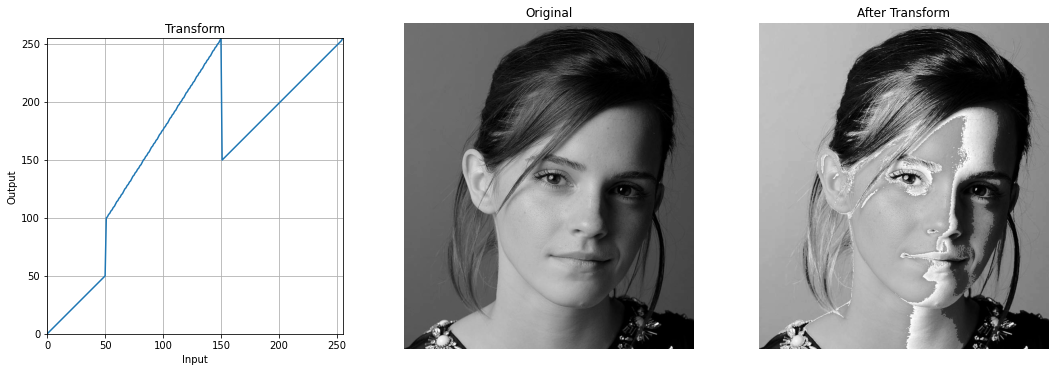

In [5]:
# code
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#input image
img = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

#transform
t1 = np.linspace(0, 50, 51)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 105)

transform = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
assert len(transform) == 256

#apply transform to the original image
img_tr = cv.LUT(img, transform)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

#plot the transform
ax[0].plot(transform)
ax[0].set_title('Transform')
ax[0].set_xlabel('Input')
ax[0].set_ylabel('Output')
ax[0].set_xlim(0, 255)
ax[0].set_ylim(0, 255)
ax[0].set_aspect('equal')
ax[0].grid()

#original image
ax[1].imshow(img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Original')
ax[1].axis('off')

#transformed image
ax[2].imshow(img_tr, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('After Transform')
ax[2].axis('off')

plt.show()

#### Question 2
(a) Accentuating white matter

(b) Accentuating grey matter

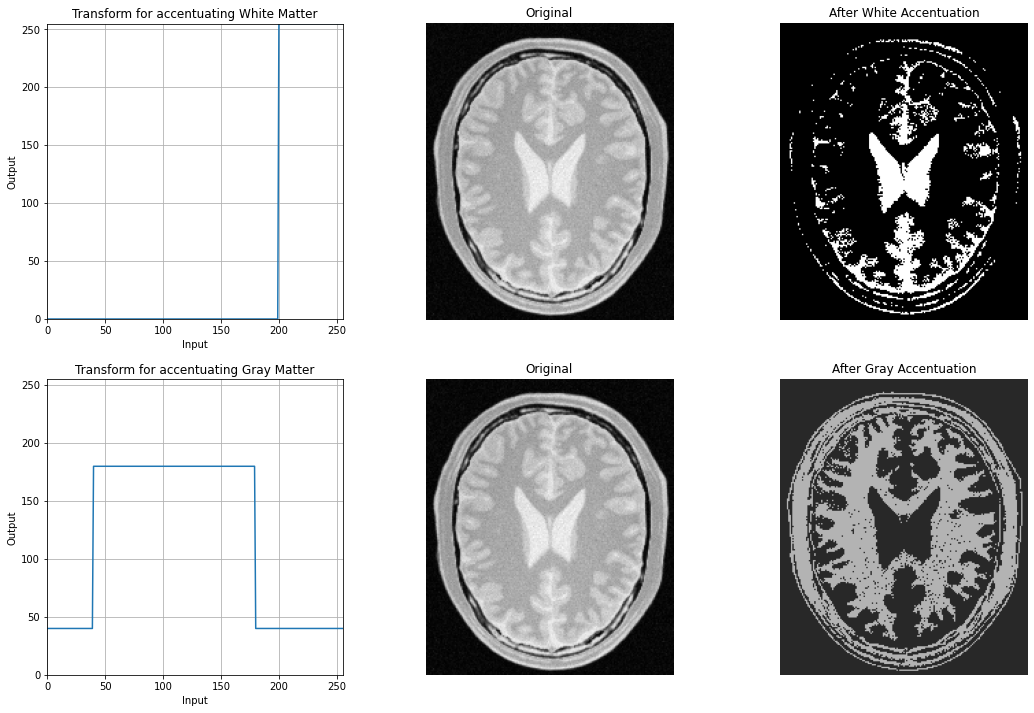

In [6]:
#input image
img1 = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img1 is not None

#transform for accentuating white
t1 = np.linspace(0, 0, 200)
t2 = np.linspace(255, 255, 56) #pixels in the range (150-255) -> (240->255)
tr_white = np.concatenate((t1, t2), axis=0).astype(np.uint8)
assert len(tr_white) == 256

#transform for accentuating gray
t3 = np.linspace(40, 40, 40)
t4 = np.linspace(180, 180, 140)
t5 = np.linspace(40, 40, 76)
tr_gray = np.concatenate((t3, t4, t5), axis=0).astype(np.uint8)
assert len(tr_gray) == 256

#apply transforms to original image
img_tr_white = cv.LUT(img1, tr_white)
img_tr_gray = cv.LUT(img1, tr_gray)

fig, ax = plt.subplots(2, 3, figsize=(18, 12))

#plot the transform for white 
ax[0, 0].plot(tr_white)
ax[0, 0].set_title('Transform for accentuating White Matter')
ax[0, 0].set_xlabel('Input')
ax[0, 0].set_ylabel('Output')
ax[0, 0].set_xlim(0, 255)
ax[0, 0].set_ylim(0, 255)
ax[0, 0].set_aspect('equal')
ax[0, 0].grid()

#original image
ax[0, 1].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Original')
ax[0, 1].axis('off')

#transformed image
ax[0, 2].imshow(img_tr_white, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('After White Accentuation')
ax[0, 2].axis('off')

#plot the transform for gray
ax[1, 0].plot(tr_gray)
ax[1, 0].set_title('Transform for accentuating Gray Matter')
ax[1, 0].set_xlabel('Input')
ax[1, 0].set_ylabel('Output')
ax[1, 0].set_xlim(0, 255)
ax[1, 0].set_ylim(0, 255)
ax[1, 0].set_aspect('equal')
ax[1, 0].grid()

#original image
ax[1, 1].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[1, 1].set_title('Original')
ax[1, 1].axis('off')

#transformed image
ax[1, 2].imshow(img_tr_gray, cmap='gray', vmin=0, vmax=255)
ax[1, 2].set_title('After Gray Accentuation')
ax[1, 2].axis('off')

plt.show()


#### Question 3
Gamma correction

(-0.5, 719.5, 479.5, -0.5)

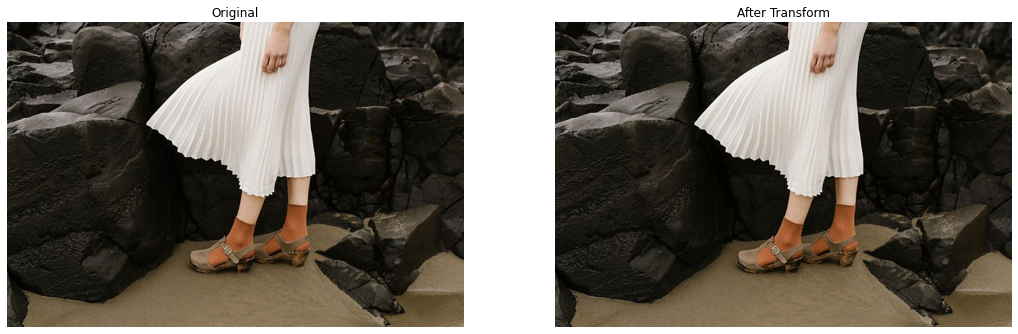

In [27]:
#input image
img2 = cv.imread('highlights_and_shadows.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
assert img2 is not None

img3 = cv.cvtColor(img2, cv.COLOR_RGB2LAB)

gamma = 1.0
transform2 = np.array([(p/255)**gamma*255 for p in range(0, 256)]).astype(np.uint8)

fig, ax = plt.subplots(1, 2, figsize=(18, 12))

#original image
ax[0].imshow(img2, vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')

#gamma correction on L plane
img3[:, :, 0] = cv.LUT(img3[:, :, 0], transform2 )

img4 = cv.cvtColor(img3, cv.COLOR_LAB2RGB)

ax[1].imshow(img4, vmin=0, vmax=255)
ax[1].set_title('After Transform')
ax[1].axis('off')
